In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense,Dropout, Activation,Lambda,Flatten
from keras.optimizers import Adam , RMSprop
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [2]:
train=pd.read_csv("train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test=pd.read_csv("test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x_train=(train.ix[:,1:].values).astype('float32')
y_train=train.ix[:,0].values.astype('int32')

x_test=test.values.astype('float32')

C:\Users\Sahil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [5]:
x_train.shape

(42000, 784)

In [6]:
y_train.shape

(42000,)

**Previewing image**

In [7]:
x_train=x_train.reshape(x_train.shape[0],28,28)

In [8]:
x_train.shape

(42000, 28, 28)

Number is 7


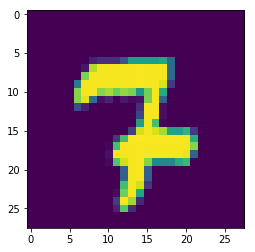

In [9]:
#change index to view other images
index=678
plt.imshow(x_train[index])
print('Number is',y_train[index])

In [10]:
x_train=x_train.reshape(x_train.shape[0],28*28)

In [11]:
x_train.shape,x_test.shape

((42000, 784), (28000, 784))

**Preprocessing**

In [12]:
x_train/=255
x_test/=255

In [13]:
#One Hot Encoding 
#I guess everybody knows this otherwise google

from keras.utils.np_utils import to_categorical
y_train=to_categorical(y_train,num_classes=10)

In [14]:
y_train.shape

(42000, 10)

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


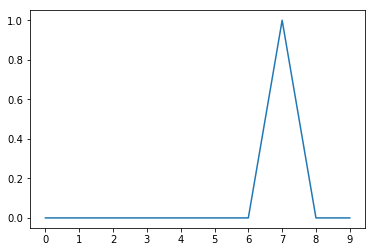

In [15]:
#same as above to verify as if it correct
print(y_train[index])
plt.plot(y_train[index])
plt.xticks(range(10))
plt.show()

**NN**

In [17]:
np.random.seed(34)

# Model 1

In [43]:
model=Sequential()
model.add(Dense(32,activation="relu",input_dim=784))
model.add(Dense(16,activation="relu"))
model.add(Dense(10,activation='softmax'))


In [44]:
#most useful function for a newbie **sobs**
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                170       
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(optimizer=RMSprop(lr=0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [46]:
cache=model.fit(x_train,y_train,epochs=25,batch_size=64, validation_split=0.05)

Train on 39900 samples, validate on 2100 samples
Epoch 1/25
39900/39900 [==============================] - 6s 141us/step - loss: 0.5333 - acc: 0.8506 - val_loss: 0.3040 - val_acc: 0.9138
Epoch 2/25
39900/39900 [==============================] - 5s 121us/step - loss: 0.2478 - acc: 0.9291 - val_loss: 0.2639 - val_acc: 0.9238
Epoch 3/25
39900/39900 [==============================] - 5s 122us/step - loss: 0.2069 - acc: 0.9402 - val_loss: 0.2337 - val_acc: 0.9357
Epoch 4/25
39900/39900 [==============================] - 5s 117us/step - loss: 0.1791 - acc: 0.9482 - val_loss: 0.2168 - val_acc: 0.9386
Epoch 5/25
39900/39900 [==============================] - 4s 112us/step - loss: 0.1578 - acc: 0.9539 - val_loss: 0.1927 - val_acc: 0.9467
Epoch 6/25
39900/39900 [==============================] - 4s 111us/step - loss: 0.1413 - acc: 0.9579 - val_loss: 0.1996 - val_acc: 0.9457
Epoch 7/25
39900/39900 [==============================] - 5s 116us/step - loss: 0.1294 - acc: 0.9615 - val_loss: 0.1834 - v

# Analysis and Learning Curve

In [47]:
cache_df=pd.DataFrame(cache.history)
cache_df

,acc,loss,val_acc,val_loss
0,0.850627,0.533267,0.913810,0.303958
1,0.929148,0.247781,0.923810,0.263934
2,0.940175,0.206901,0.935714,0.233660
3,0.948170,0.179084,0.938571,0.216780
4,0.953910,0.157829,0.946667,0.192707
5,0.957870,0.141261,0.945714,0.199563
6,0.961529,0.129408,0.949524,0.183381
7,0.963684,0.121032,0.953810,0.163840
8,0.967669,0.111342,0.959048,0.160700
9,0.969023,0.105079,0.957143,0.165255


**Plotting Loss and Validation Loss**

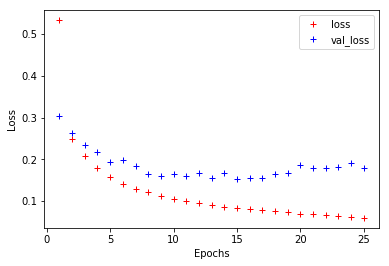

In [48]:
epochs=range(1,cache_df.shape[0]+1)

plt.plot(epochs,cache_df['loss'],'r+',label='loss')
plt.plot(epochs,cache_df['val_loss'],'b+',label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

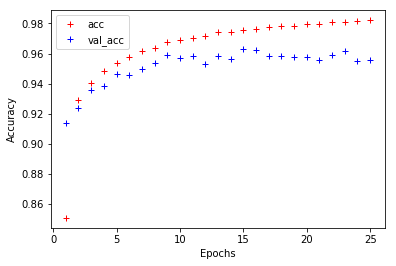

In [49]:
plt.plot(epochs,cache_df['acc'],'r+',label='acc')
plt.plot(epochs,cache_df['val_acc'],'b+',label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#        We can see that it is case of     OVERFITTING

**We need to reduce the variance . Things that can be done** <br>
  1. Regularization <br>
  2. Dropout <br>
  3. Reduce epoch<br>
  
**Let's Build a new mode with Dropout and reducing epoch to 15**
  

In [50]:
model=Sequential()
model.add(Dense(32,activation="relu",input_dim=784))
model.add(Dropout(0.15))
model.add(Dense(16,activation="relu"))
model.add(Dropout(0.15))
model.add(Dense(10,activation='softmax'))

In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                25120     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                170       
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile(optimizer=RMSprop(lr=0.0001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [54]:
cache=model.fit(x_train,y_train,epochs=15,batch_size=64, validation_split=0.05)

Train on 39900 samples, validate on 2100 samples
Epoch 1/15
39900/39900 [==============================] - 5s 127us/step - loss: 1.6522 - acc: 0.4732 - val_loss: 1.2103 - val_acc: 0.6714
Epoch 2/15
39900/39900 [==============================] - 5s 130us/step - loss: 1.1863 - acc: 0.6123 - val_loss: 0.8568 - val_acc: 0.7671
Epoch 3/15
39900/39900 [==============================] - 5s 135us/step - loss: 0.9474 - acc: 0.6965 - val_loss: 0.6571 - val_acc: 0.8400
Epoch 4/15
39900/39900 [==============================] - 5s 137us/step - loss: 0.8054 - acc: 0.7495 - val_loss: 0.5480 - val_acc: 0.8690
Epoch 5/15
39900/39900 [==============================] - 5s 125us/step - loss: 0.7118 - acc: 0.7797 - val_loss: 0.4794 - val_acc: 0.8867
Epoch 6/15
39900/39900 [==============================] - 5s 128us/step - loss: 0.6530 - acc: 0.7971 - val_loss: 0.4351 - val_acc: 0.8957
Epoch 7/15
39900/39900 [==============================] - 5s 130us/step - loss: 0.6015 - acc: 0.8143 - val_loss: 0.4012 - v

In [55]:
cache_df=pd.DataFrame(cache.history)
cache_df

,acc,loss,val_acc,val_loss
0,0.473233,1.652210,0.671429,1.210299
1,0.612256,1.186300,0.767143,0.856840
2,0.696491,0.947356,0.840000,0.657068
3,0.749499,0.805380,0.869048,0.548009
4,0.779749,0.711808,0.886667,0.479437
5,0.797118,0.652994,0.895714,0.435117
6,0.814286,0.601517,0.904286,0.401244
7,0.828797,0.563549,0.906667,0.376162
8,0.834261,0.535728,0.910952,0.356854
9,0.846441,0.503615,0.915238,0.339516


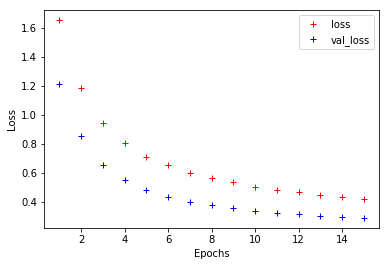

In [56]:
epochs=range(1,cache_df.shape[0]+1)

plt.plot(epochs,cache_df['loss'],'r+',label='loss')
plt.plot(epochs,cache_df['val_loss'],'b+',label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

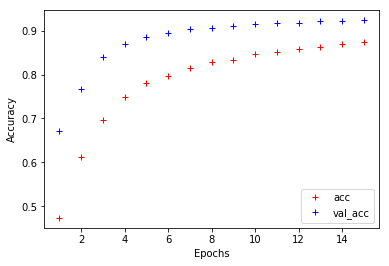

In [57]:
plt.plot(epochs,cache_df['acc'],'r+',label='acc')
plt.plot(epochs,cache_df['val_acc'],'b+',label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [58]:
preds=model.predict_classes(x_test,verbose=0)

In [59]:
preds[0:5]

array([2, 0, 9, 9, 3], dtype=int64)

In [60]:
subs=pd.DataFrame({"ImageId":list(range(1,len(preds)+1)),"Label":preds})
subs.to_csv("sub2.csv",index=False,header=True)

# Leaderboard score - 0.92714